TODO: add XGboost

TODO: calculate precentages of family, species, etc.

# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
import master_functions as mf

In [2]:
df_all = pd.read_pickle('main_df.pkl')
df_all_small = pd.read_csv('test/dfs&results/df_all_small.tsv', sep='\t')
learning_df = pd.read_csv('test/dfs&results/learning_df.tsv', sep='\t')
# results = load('test/results.joblib')
results_small = load('test/dfs&results/results_small.joblib')

In [4]:
df_all.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1


In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_validate

logo = LeaveOneGroupOut()
X_main = df_all_small.drop(['virus', 'host', 'group', 'group_code', 'y', '0', '1'], axis=1)
y_main = df_all_small['y']
groups_main = df_all_small['group_code'].values

# Creation of dfs

## Random Forest

In [54]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# get X and y
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

# train the model
# determine the scoring method
scoring = ['f1']
# create logo cv procedure
logo = LeaveOneGroupOut()
# create model
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', 
                            max_depth=4, random_state=1)
# evaluate model
results_rfc = cross_validate(rfc, X_learning, y_learning, scoring=scoring, 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [44]:
dump(results_rfc, 'test/dfs&results/results_rfc.joblib')

['test/dfs&results/results_rfc.joblib']

In [32]:
# get the probabilities
X_sel_main = df_all_small.drop(['virus', 'host', 'group', 'group_code', 'y', '0', '1'], axis=1)
prob_df_sel = pd.DataFrame(index=range(len(df_all_small['y'])), columns=['0', '1'])
prob_df_sel['0'] = prob_df_sel['0'].astype('float')
prob_df_sel['1'] = prob_df_sel['1'].astype('float')
for i in range(0, max(groups_main)+1):
    mask_main = groups_main == i
    prob_df_sel.loc[mask_main, ['0', '1']] = \
        results_rfc['estimator'][i].predict_proba(X_sel_main.loc[mask_main,:])


In [34]:
df_all_small.iloc[:,:-3] 

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213175,NC_024392,NC_009664,0.0,0.0,0.380006,0.0,0.006918,1.525475,1.535981,0.0,-1.46593,Listeriaceae,22
2213176,NC_024392,NC_011891,0.0,0.0,0.382821,0.0,0.010627,1.509128,1.523096,0.0,-1.47323,Listeriaceae,22
2213177,NC_024392,NC_015514,0.0,0.0,0.382899,0.0,0.007646,1.544129,1.575653,0.0,-1.45837,Listeriaceae,22
2213178,NC_024392,NC_011145,0.0,0.0,0.384063,0.0,0.010793,1.507242,1.526537,0.0,-1.47286,Listeriaceae,22


In [38]:
df_rfc = pd.concat([df_all_small.iloc[:,:-2], prob_df_sel], axis=1) 

In [37]:
df_all_small.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.870,0.130
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.730,0.270
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.805,0.195
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.875,0.125
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.800,0.200


In [39]:
df_rfc.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.342766,0.657234
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.338572,0.661428
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.342070,0.657930
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.347298,0.652702
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.342070,0.657930


In [41]:
df_rfc.to_csv('test/dfs&results/df_all_rfc.tsv', sep='\t')

## Logistic Regression

In [42]:
df_lrc = pd.read_csv('test/dfs&results/df_all_lrc.tsv', sep='\t')

In [43]:
df_lrc.head()

,Unnamed: 0,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.453301,0.546699
1,1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.458118,0.541882
2,2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.458727,0.541273
3,3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.459066,0.540934
4,4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.458766,0.541234


## LinearSVC

Normal SVC with linear kernel

In [60]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

# get X and y
X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()


In [61]:
logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', LinearSVC(C=0.01, class_weight={0:1, 1:1.5})),
])

# evaluate model
results_svc = cross_validate(pipe, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)


In [6]:
results_svc = load('test/dfs&results/results_linsvc.joblib')

In [62]:
# get the probabilities
X_sel_main = df_all_small[X_learning.columns]
prob_series_svc = pd.DataFrame(index=range(len(df_all_small['y'])), columns=['prob'])
prob_series_svc['prob'] = prob_series_svc['prob'].astype('float')
for i in range(0, max(groups_main)+1):
    mask_main = groups_main == i
    X_curr = Normalizer().fit_transform(X_sel_main.loc[mask_main,:])
    prob_series_svc.loc[mask_main, ['prob']] = \
        results_svc['estimator'][i].decision_function(X_curr).reshape(len(X_curr), 1)

In [11]:
prob_series_svc

,prob
0,0.691382
1,0.691718
2,0.691481
3,0.691399
4,0.691474
...,...
2213175,-1.121109
2213176,-1.120615
2213177,-1.143411
2213178,-1.125196


In [17]:
df_prob_svc = pd.concat([df_all_small['y'], prob_series_svc], axis=1)

In [21]:
df_prob_svc = df_prob_svc.rename(columns={'prob': '1'})

In [22]:
df_prob_svc.head()

,y,1
0,1,0.691382
1,1,0.691718
2,1,0.691481
3,1,0.691399
4,1,0.691474


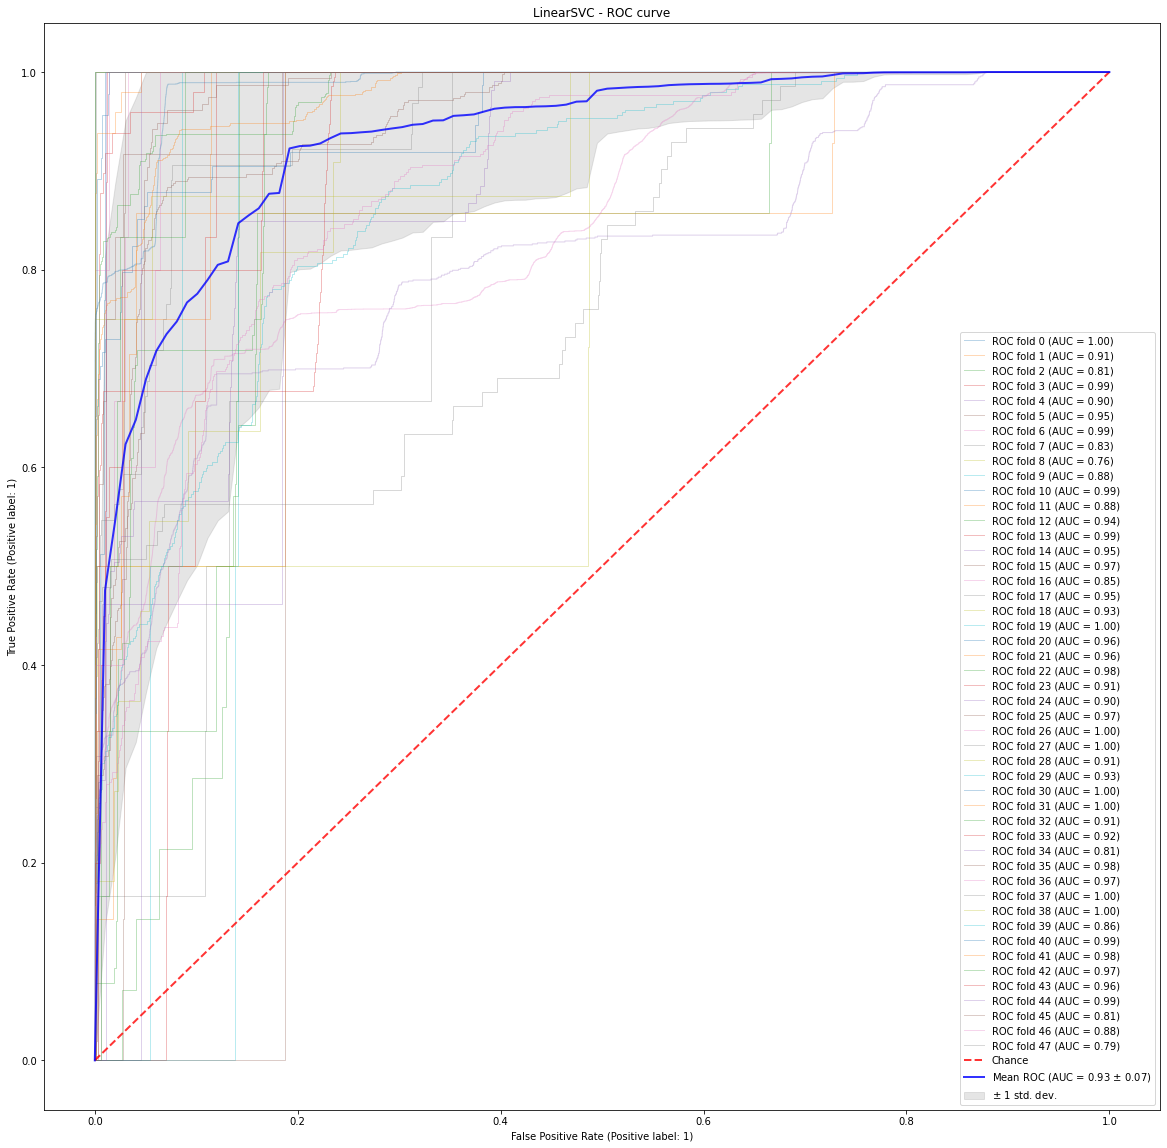

In [23]:
draw_roc_cv(df_prob_svc, 'LinearSVC')

In [64]:
res_svc_proba = {'estimator': []}
from sklearn.calibration import CalibratedClassifierCV
for i,est in enumerate(results_svc['estimator']):
    res_svc_proba['estimator'].append(CalibratedClassifierCV(est, cv='prefit'))
    res_svc_proba['estimator'][i].fit(X_learning[learning_df['group_code'] == i].values, y_learning[learning_df['group_code'] == i])

In [13]:
res_svc_proba['estimator'][0].predict_proba(X_learning[learning_df['group_code'] == 0].iloc[0:1])

array([[0.73301493, 0.26698507]])

In [65]:
prob_df_svc = get_probabilities_norm(X_learning.columns, res_svc_proba)

In [20]:
prob_df_svc

,0,1
0,0.272313,0.727687
1,0.271988,0.728012
2,0.272218,0.727782
3,0.272296,0.727704
4,0.272224,0.727776
...,...,...
2213175,0.995514,0.004486
2213176,0.995504,0.004496
2213177,0.995908,0.004092
2213178,0.995589,0.004411


In [25]:
df_all_small.iloc[:,:-2]

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213175,NC_024392,NC_009664,0.0,0.0,0.380006,0.0,0.006918,1.525475,1.535981,0.0,-1.46593,Listeriaceae,22,0
2213176,NC_024392,NC_011891,0.0,0.0,0.382821,0.0,0.010627,1.509128,1.523096,0.0,-1.47323,Listeriaceae,22,0
2213177,NC_024392,NC_015514,0.0,0.0,0.382899,0.0,0.007646,1.544129,1.575653,0.0,-1.45837,Listeriaceae,22,0
2213178,NC_024392,NC_011145,0.0,0.0,0.384063,0.0,0.010793,1.507242,1.526537,0.0,-1.47286,Listeriaceae,22,0


In [26]:
# get probabilities and put them to the results dict
svc_probs_df = pd.concat([df_all_small.iloc[:,:-2], prob_df_svc], axis=1)

In [27]:
svc_probs_df.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.272313,0.727687
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.271988,0.728012
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.272218,0.727782
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.272296,0.727704
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.272224,0.727776


In [28]:
svc_probs_df.to_csv('test/dfs&results/df_all_linsvc.tsv', sep='\t')

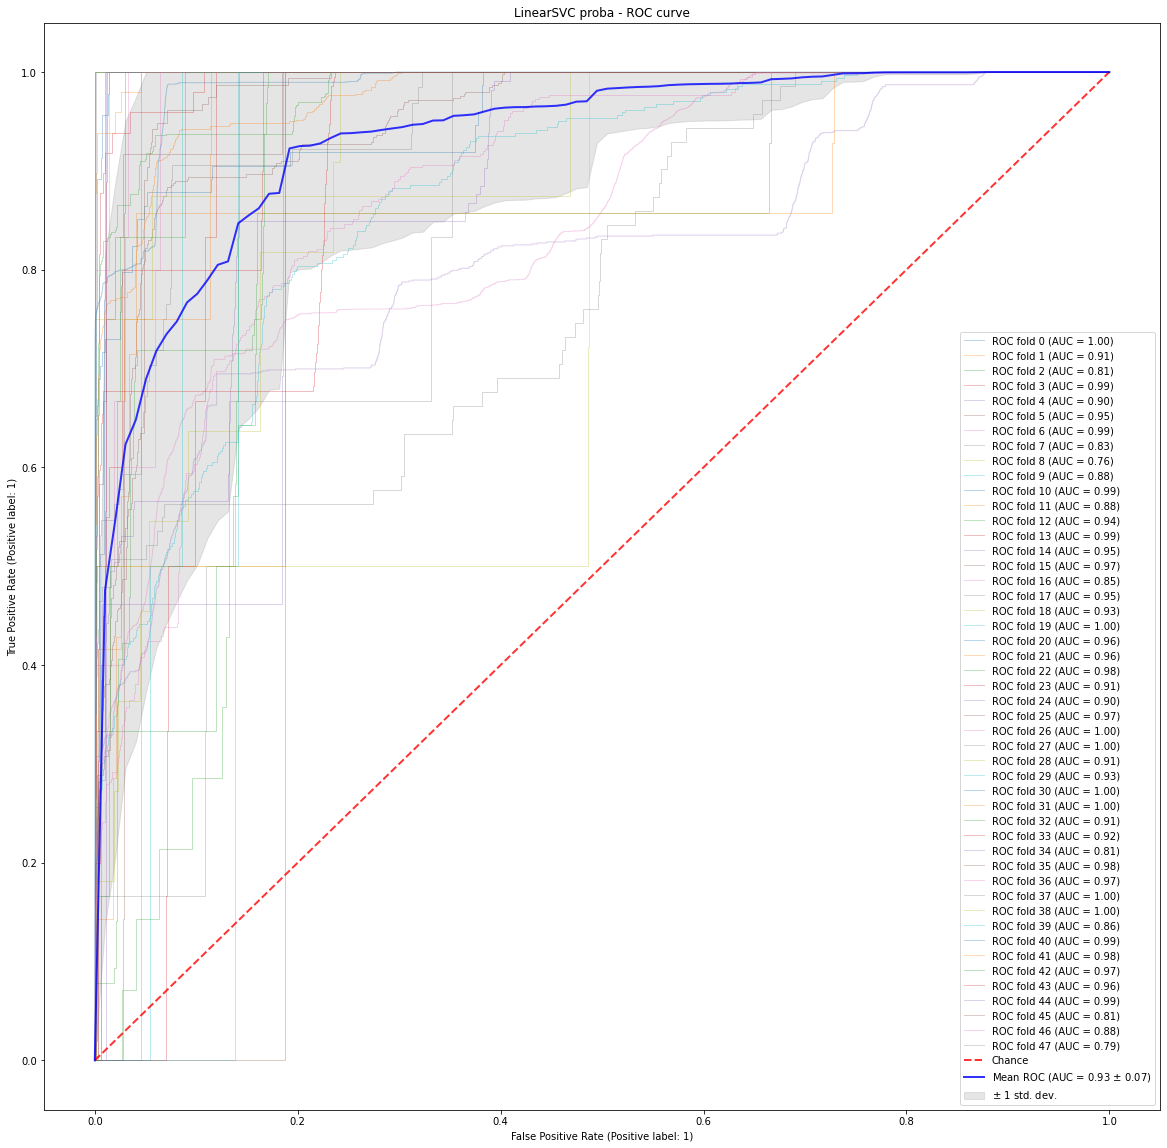

In [29]:
draw_roc_cv(svc_probs_df.loc[:,['y', '0', '1']], 'LinearSVC proba')

In [30]:
def draw_precision_recall_curve(dfs: list, names: list):
    plt.figure(figsize=(12, 7))
    ax = plt.gca()
    for i, df in enumerate(dfs):
        color = next(ax._get_lines.prop_cycler)['color']
        precision, recall, thresholds = precision_recall_curve(df['y'], df['1'])
        auc_temp = auc(recall, precision)
        f1_scores = 2*recall*precision/(recall+precision)
        index = np.argmax(f1_scores)

        line = plt.plot(recall, precision, label=f'AUC ({names[i]}) = {auc_temp:.2f}', color=color)
        plt.plot(recall[index], precision[index], marker='o', color=color) # marker
        plt.text(recall[index], precision[index]+(0.03 if i%2 == 0 else -0.05), \
             f'x={recall[index]:.2f}, y={precision[index]:.2f}', color=color)
    plt.title('Precision-Recall Curve', size=20)
    plt.xlabel('Recall', size=14)
    plt.ylabel('Precision', size=14)
    plt.legend()

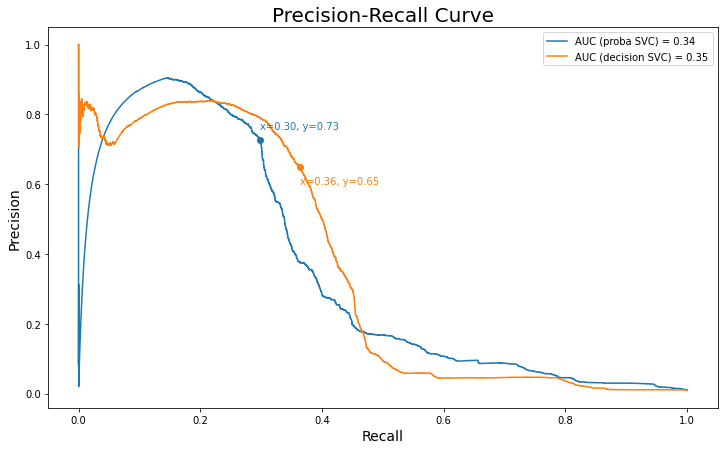

In [38]:
draw_precision_recall_curve([svc_probs_df, df_prob_svc], ['proba SVC', 'decision SVC'])

## SGD

In [66]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('svc', SGDClassifier(alpha=0.005, loss='log', penalty='l1'))])

# evaluate model
results_sgd = cross_validate(pipe, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [ ]:
dump(results_sgd, 'test/dfs&results/results_sgd.joblib')

['test/dfs&results/results_sgd.joblib']

In [67]:
# get probabilities and put them to the results dict
sgd_probs_df = get_probabilities_norm(X_learning.columns, results_sgd)

In [47]:
df_sgd = pd.concat([df_all_small.iloc[:,:-2], sgd_probs_df], axis=1) 

In [48]:
df_sgd.head()

,virus,host,blastn,crisprdetect-2mismatch,gc_content,k25,k6-chebyshev,k6-kendalltau,k6-manhattan,piler-2mismatch,wish,group,group_code,y,0,1
0,NC_010363,NC_008527,60.8,0.0,0.021973,0.0,0.002122,0.398421,0.382144,0.0,-1.33553,Streptococcaceae,41,1,0.202477,0.797523
1,NC_010363,NC_002662,59.0,0.0,0.016709,0.0,0.001929,0.397773,0.377498,0.0,-1.33035,Streptococcaceae,41,1,0.202557,0.797443
2,NC_010363,NC_017949,59.0,0.0,0.020818,0.0,0.002088,0.396969,0.379686,0.0,-1.33341,Streptococcaceae,41,1,0.202583,0.797417
3,NC_010363,NC_017492,59.0,0.0,0.022209,0.0,0.002131,0.396148,0.380930,0.0,-1.33767,Streptococcaceae,41,1,0.202598,0.797402
4,NC_010363,NC_009004,59.0,0.0,0.020871,0.0,0.002088,0.397095,0.379834,0.0,-1.33341,Streptococcaceae,41,1,0.202585,0.797415


In [50]:
df_sgd.to_csv('test/dfs&results/df_all_sgd.tsv', sep='\t')

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']

logo = LeaveOneGroupOut()
pipe = Pipeline([
    ('normalize', Normalizer()),
    ('knn', KNeighborsClassifier(algorithm='kd_tree', leaf_size=5)),
])

# evaluate model
results_knn = cross_validate(pipe, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [68]:
dump(results_knn, 'test/dfs&results/results_knn.joblib')

['test/dfs&results/results_knn.joblib']

In [59]:
# get probabilities and put them to the results dict
knn_prob_df = mf.get_probabilities(X_learning.columns, results_knn, df_all, normalize=True)

In [70]:
df_knn = pd.concat([df_all_small.iloc[:,:-2], knn_prob_df], axis=1)

In [73]:
df_knn.to_csv('test/dfs&results/df_all_knn.tsv', sep='\t')

## XGBoost

In [3]:
from sklearn.model_selection import LeaveOneGroupOut, cross_validate
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X_learning = learning_df.drop(['virus', 'host', 'group', 'group_code', 'y'], axis=1)
y_learning = learning_df['y']
groups = learning_df['group_code'].to_numpy()

xgb4 = XGBClassifier(max_depth=4)
logo = LeaveOneGroupOut()

# evaluate model
results_xgb4 = cross_validate(xgb4, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [10]:
xgb2 = XGBClassifier(max_depth=2)
results_xgb2 = cross_validate(xgb2, X_learning.values, y_learning, scoring='f1', 
                        cv=logo, groups=groups, n_jobs=-1, return_estimator=True)

In [4]:
df_xgb4 = pd.concat([df_all,
        mf.get_probabilities(X_learning.columns, results_xgb4, df_all)], axis=1)

In [9]:
df_xgb4.to_pickle('test/dfs&results/df_all_xgb4.pkl')

In [5]:
orgs = mf.load_in_taxonomy_json()

In [6]:
xgb_percentages = mf.get_correct_preds_percentages(df_xgb4, orgs, 'xgb')

In [7]:
xgb_percentages

,species_correct,genus_correct,family_correct,order_correct,class_correct,phylum_correct,superkingdom_correct
xgb,37.784091,49.905303,57.102273,60.700758,74.526515,83.617424,100.0


In [26]:
from importlib import reload
reload(mf)

<module 'master_functions' from 'c:\\licencjat\\master_functions.py'>

In [22]:
df_xgb2 = pd.concat([df_all,
        mf.get_probabilities_xgb(X_learning.columns, results_xgb2, df_all)], axis=1)

189108    [[0.0118585825, 0.9881414], [0.037644207, 0.96...
189109    [[0.0118585825, 0.9881414], [0.037644207, 0.96...
189110    [[0.0118585825, 0.9881414], [0.037644207, 0.96...
189111    [[0.0118585825, 0.9881414], [0.037644207, 0.96...
189112    [[0.0118585825, 0.9881414], [0.037644207, 0.96...
                                ...                        
905267    [[0.037644207, 0.9623558], [0.037644207, 0.962...
905268    [[0.037644207, 0.9623558], [0.037644207, 0.962...
905269    [[0.037644207, 0.9623558], [0.037644207, 0.962...
905270    [[0.037644207, 0.9623558], [0.037644207, 0.962...
905271    [[0.037644207, 0.9623558], [0.037644207, 0.962...
Length: 2699, dtype: object
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\misia\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\misia\AppData\Local\Temp\ipykernel_6024\3620636838.py", line 2, in <cell line: 1>
    mf.get_probabilities_xgb(X_learning.columns, results_xgb2, df_all)], axis=1)
  File "c:\licencjat\master_functions.py", line 79, in get_probabilities_xgb
    prob_df_sel.loc[mask_main, ['0', '1']] = to_put
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py", line 716, in __setitem__
    iloc._setitem_with_indexer(indexer, value, self.name)
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py", line 1688, in _setitem_with_indexer
    self._setitem_with_indexer_split_path(indexer, value, name)
  File "C:\Users\misia\AppData\Local\Programs\Python\Python310\lib\site-packa

In [24]:
test = pd.concat([df_all,
        mf.get_probabilities(X_learning.columns, results_xgb4, df_all)], axis=1)

In [27]:
test2 = pd.concat([df_all,
        mf.get_probabilities_xgb(X_learning.columns, results_xgb4, df_all)], axis=1)

ValueError: shape mismatch: value array of shape (2699,9,2) could not be broadcast to indexing result of shape (2699,)

# Visualisation

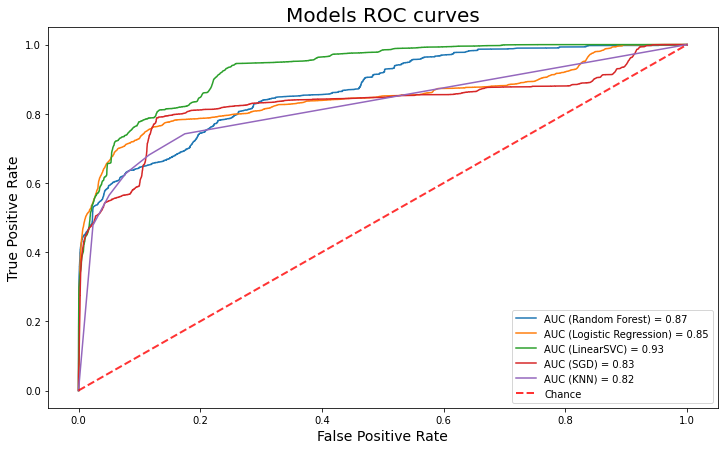

In [90]:
mf.draw_rocs(
    dfs=[
        df_rfc[['y', '0', '1']],
        df_lrc[['y', '0', '1']],
        svc_probs_df[['y', '0', '1']],
        df_sgd[['y', '0', '1']],
        df_knn[['y', '0', '1']]
    ],
    names=[
        'Random Forest',
        'Logistic Regression',
        'LinearSVC',
        'SGD',
        'KNN'
    ],
    plot_name='Models ROC curves'
)

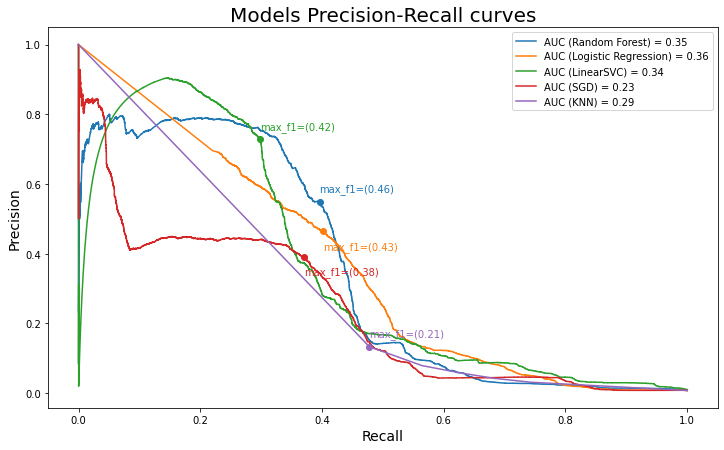

In [116]:
draw_precision_recall_curve(
    dfs=[
        df_rfc[['y', '0', '1']],
        df_lrc[['y', '0', '1']],
        svc_probs_df[['y', '0', '1']],
        df_sgd[['y', '0', '1']],
        df_knn[['y', '0', '1']]
    ],
    names=[
        'Random Forest',
        'Logistic Regression',
        'LinearSVC',
        'SGD',
        'KNN'
    ],
    plot_name='Models Precision-Recall curves'
)

# Get percentages 

Get access to functions defined in "functions.py" file

In [2]:
import import_ipynb
import master_functions as mf

importing Jupyter notebook from master_functions.ipynb


In [10]:
import master_functions as mf

In [3]:
df_rfc = pd.read_csv('test/dfs&results/df_all_rfc.tsv', sep='\t')

In [4]:
orgs = mf.load_in_taxonomy_json()

In [5]:
rfc_percentages = mf.get_correct_preds_percentages(df_rfc, orgs)

Random Forest

In [8]:
rfc_percentages

,species_correct,genus_correct,family_correct,order_correct,class_correct,phylum_correct,superkingdom_correct
0,44.331641,59.813875,70.135364,74.027073,86.463621,91.201354,100.0


In [9]:
df_lrc = pd.read_csv('test/dfs&results/df_all_lrc.tsv', sep='\t')

In [10]:
lrc_percentages = mf.get_correct_preds_percentages(df_lrc, orgs)

In [11]:
lrc_percentages

,virus,host,1,species_correct,genus_correct,family_correct,order_correct,class_correct,phylum_correct,superkingdom_correct
0,NaN,NaN,NaN,65.311699,72.177626,95.200683,96.362084,97.882152,98.958155,100.0
